In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

#Import donnees directement en echantillions train et test
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

Combien d'elements dans jeu train et test

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

Dimension des images: (28,28)

Interpretation du contenu des donnees
Pas de couleurs parce qu'il n'y a pas de dimension pour la couleur !
C'est donc en noir et blanc

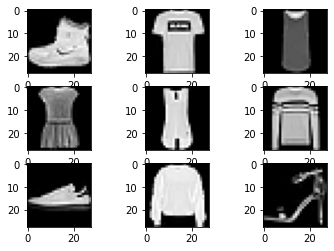

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap = plt.get_cmap('gray'))
plt.show()

Mise en forme des donnees

In [ ]:
x_train, x_test = x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

Creer un dict associant label et valeurs de classes

In [ ]:
classes = np.unique(y_train)
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
mapping = dict(zip(classes,class_labels))

In [ ]:
mapping

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

Creation modele:
couche Input
1ere couche convultion avec 32 filtres 3*3 avec une activation "relu"
2ere couche convultion avec 16 filtres 3*3 avec une activation "relu"
une couche Flatten 
une couche Prediction activation "softmax"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Input(shape = x_train.shape[1:]),
    layers.Conv2D(filters = 32,kernel_size = (3,3), padding = "same",activation = "relu"),
    layers.Conv2D(filters = 16,kernel_size = (3,3), padding = "same",activation = "relu"),

    layers.Flatten(),
    layers.Dense(len(classes), activation = "softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                125450    
                                                                 
Total params: 130,394
Trainable params: 130,394
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile("adam","sparse_categorical_crossentropy",["accuracy"])

In [ ]:
model.fit(x_train,y_train,batch_size = 256, epochs = 5, validation_data = (x_test,y_test))

Epoch 1/5
235/235 [==============================] - 98s 413ms/step - loss: 0.5339 - accuracy: 0.8139 - val_loss: 0.3855 - val_accuracy: 0.8666
Epoch 2/5
235/235 [==============================] - 97s 414ms/step - loss: 0.3434 - accuracy: 0.8795 - val_loss: 0.3419 - val_accuracy: 0.8791
Epoch 3/5
235/235 [==============================] - 97s 412ms/step - loss: 0.3021 - accuracy: 0.8929 - val_loss: 0.3312 - val_accuracy: 0.8823
Epoch 4/5
235/235 [==============================] - 97s 413ms/step - loss: 0.2767 - accuracy: 0.9000 - val_loss: 0.3060 - val_accuracy: 0.8919
Epoch 5/5
235/235 [==============================] - 116s 493ms/step - loss: 0.2543 - accuracy: 0.9090 - val_loss: 0.2960 - val_accuracy: 0.8947


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
y_test_preds = model.predict(x_test)
y_test_preds = np.argmax(y_test_preds, axis = 1)

print("Test Accuracy : {}".format(accuracy_score(y_test,y_test_preds)))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test,y_test_preds))
print("\nClassification report : ")
print(classification_report(y_test,y_test_preds,target_names = class_labels))

Test Accuracy : 0.8947

Confusion Matrix : 
[[840   0  15  26   5   2 105   0   7   0]
 [  0 979   0  13   4   0   3   0   1   0]
 [ 15   1 801  12 100   1  70   0   0   0]
 [ 21  11   9 903  35   0  21   0   0   0]
 [  1   1  39  21 893   0  45   0   0   0]
 [  0   0   0   1   0 981   0  13   0   5]
 [113   1  64  38 103   0 677   0   4   0]
 [  0   0   0   0   0  10   0 964   0  26]
 [  4   1   2   8   9   6  11   4 955   0]
 [  0   0   0   0   0  11   2  33   0 954]]

Classification report : 
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.86      0.80      0.83      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.78      0.89      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.72      0.68      0.70      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag

In [ ]:
!pip install shap
import shap
print("SHAP Version : {}".format(shap.__version__))
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 2.1 MB/s 
SHAP Version : 0.41.0


In [ ]:
masker = shap.maskers.Image("inpaint_telea", x_train[0].shape)
# Maniere de masquer l'image pour voir impacte sur prevision/model


In [ ]:
explainer  = shap.Explainer(model,masker,output_names = class_labels)

In [ ]:
shap_values = explainer(x_test[:4], outputs = shap.Explanation.argsort.flip[:5])

In [ ]:
print("Actual labels :{}".format([mapping[i] for i in y_test[:4]]))
probs = model.predict(x_test[:4])
print("Predicted labels :{}".format([mapping[i] for i in np.argmax(probs,axis = 1)]))
print("Probabilities :{}".format(np.max(probs,axis = 1)))

Actual labels :['Ankle boot', 'Pullover', 'Trouser', 'Trouser']
Predicted labels :['Ankle boot', 'Pullover', 'Trouser', 'Trouser']
Probabilities :[0.98297024 0.99329305 0.99994254 0.99998546]


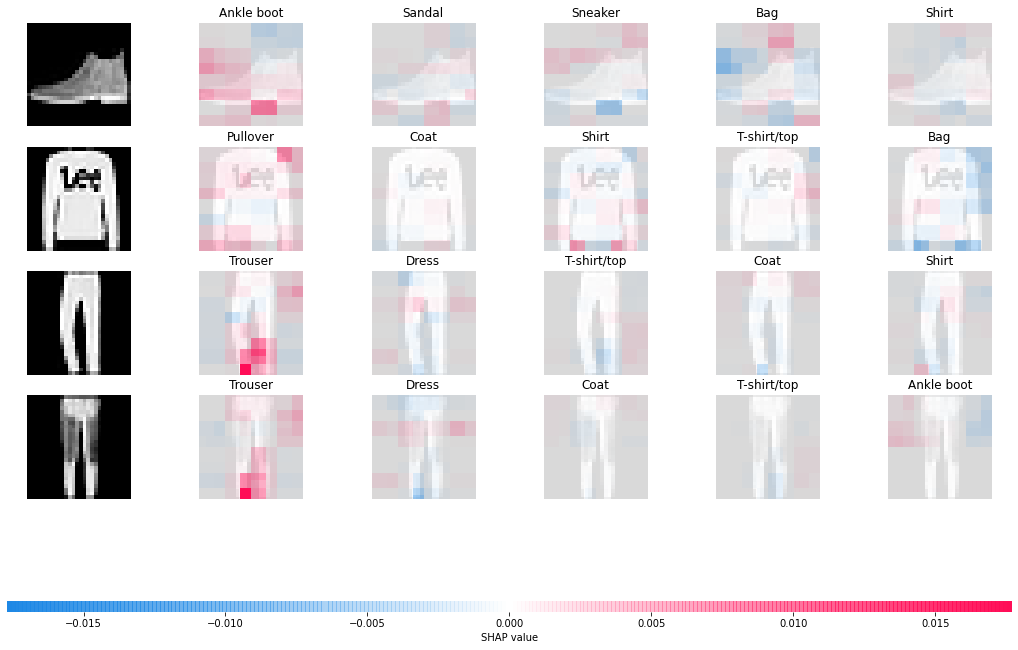

In [ ]:
masker = shap.maskers.Image("blur(28,28)", x_train[0].shape)
explainer  = shap.Explainer(model,masker,output_names = class_labels)
shap_values = explainer(x_test[:4], outputs = shap.Explanation.argsort.flip[:5])
shap.image_plot(shap_values)

# Zones rouge indique impact positif sur criteres
# Zones bleu indique impact negatif sur criteres
